In [1]:
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
from jax.experimental.ode import odeint

jax.config.update("jax_enable_x64", True)
from pyutils.jax import buiter
from pyutils.jax.solvers import newton_solver

# New Keynesian Model in Continuous Time

$$\dot i^* = -\lambda_i (i^*-\rho)$$
$$\dot x = i^*-r+(\phi-1)\pi$$
$$\dot\pi = \rho\pi -\kappa x$$

Note that predetermined variabless ($i^*$) come first.

In [2]:
i_star = 0.02
r = 0.02
phi = 1.3
rho = 0.02
epsilon = 10
varphi = 1
theta = 100
lambda_i = 0.5

kappa = (epsilon-1)*(1+varphi)/theta
A = jnp.array([[-lambda_i, 0, 0],
              [1, 0, (phi-1)],
              [0, -kappa, rho]])
B = jnp.array([[lambda_i*rho],
               [-r],
               [0]])
x = jnp.array(0.0175).reshape(-1,1)
t, sol = buiter.simulate(A, B, x, T = 10)

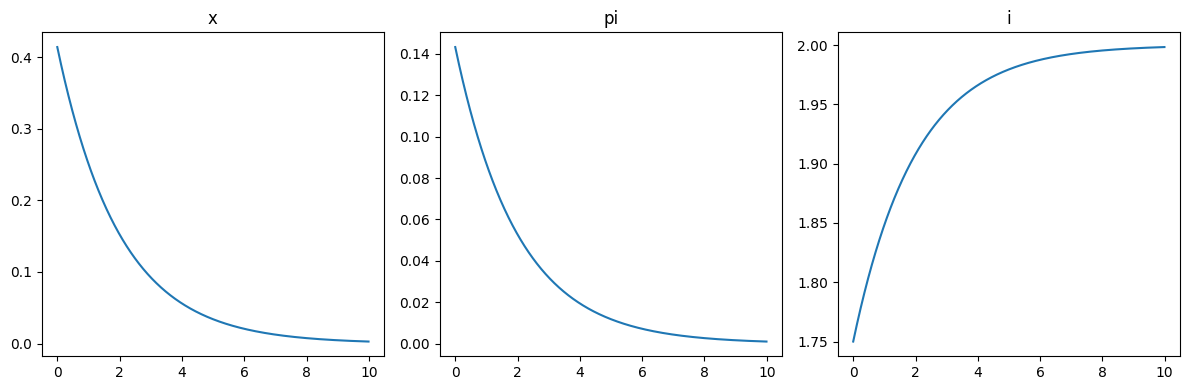

In [3]:
fig, ax = plt.subplots(ncols = 3, figsize = (12,4))
ax[0].plot(t, sol[:,1]*100)
ax[0].set_title("x")
ax[1].plot(t, sol[:,2]*100)
ax[1].set_title("pi")
ax[2].plot(t, sol[:,0]*100)
ax[2].set_title("i")
plt.tight_layout()
plt.show()

## Non Linear

$$\dot i^* = -\lambda_i (i^*-\rho)$$
$$\frac{\dot X}{X}=i^*+(\phi-1)\pi-r$$
$$\rho\pi=\frac{\epsilon-1}{\theta}(X^{1+\varphi}-1)+\dot\pi$$

In [4]:
def foo(x):
    i, x, pi = x
    di = -lambda_i * (i-rho)
    dx = x*(i+(phi-1)*pi - r)
    dpi = -(epsilon-1)/theta*(x**(1+varphi)-1) + rho*pi
    return jnp.array([di, dx, dpi])

In [5]:
ss = newton_solver(foo, jnp.array([rho,1.,0.]))

In [6]:
A, B, ss = buiter.linearize(foo, jnp.array([rho, 1, 0]))

In [7]:
x = jnp.array(0.0175).reshape(-1,1)

In [8]:
t, sol = buiter.simulate(A, B, x, T = 10)

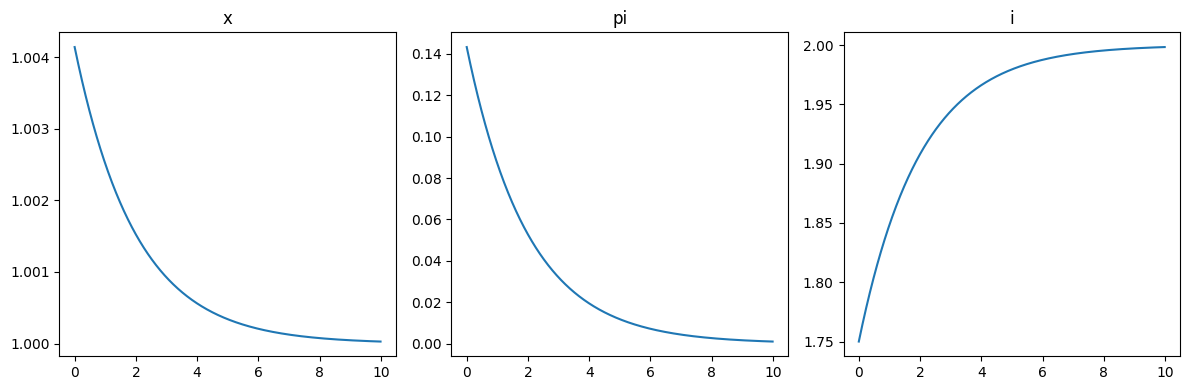

In [10]:
fig, ax = plt.subplots(ncols = 3, figsize = (12,4))
ax[0].plot(t, sol[:,1])
ax[0].set_title("x")
ax[1].plot(t, sol[:,2]*100)
ax[1].set_title("pi")
ax[2].plot(t, sol[:,0]*100)
ax[2].set_title("i")
plt.tight_layout()
plt.show()

In [11]:
A

Array([[-0.5 , -0.  , -0.  ],
       [ 1.  ,  0.  ,  0.3 ],
       [ 0.  , -0.18,  0.02]], dtype=float64)